# CREDIT RISK CLSSIFIER

This project focuses on classifying bank clients into 'risk' or 'no risk' categories to determine their creditworthiness. Using machine learning, the model analyzes client data to predict the likelihood of default, helping banks make informed lending decisions.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, normaltest 

## Data Description

In [5]:
data = pd.read_csv("bank_data.csv", index_col = 0)
data.head()

,age,income,children,credit_history,overdue_payments,active_loans,years_in_job,employment_type,owns_property,assets_value,other_loans,education,city,marital_status,support_indicator,credit_risk
0,44,15689 złoty,brak,dobra historia,brak opóźnień,2,9,samozatrudnienie,NaN,NaN,1,wyższe,małe,żonaty/zamężna,0.178131,0
1,38,18906 złoty,4 dzieci,brak historii,brak opóźnień,0,1,stała,tak,62965 złoty,0,średnie,średnie,kawaler/panna,0.370480,0
2,46,16338 złoty,2 dzieci,NaN,NaN,2,4,brak,tak,124967 złoty,0,podstawowe,duże,żonaty/zamężna,0.712334,0
3,55,23276 złoty,3 dzieci,dobra historia,opóźnienia,2,10,stała,tak,52147 złoty,1,średnie,małe,kawaler/panna,0.665050,0
4,37,40000 złoty,1 dzieci,brak historii,NaN,1,9,określona,nie,33957 złoty,1,wyższe,małe,kawaler/panna,0.607151,0


- age - Age of the client (years) 
- income - Annual income of the client (with "złoty" added as currency) 
- children - Number of children the client has; 0 is encoded as "none" 
- credit_history - Credit history status: "no history," "good history," "bad history" 
- overdue_payments -  Status of overdue payments: "no overdue" or "overdue" 
- active_loans - Number of active loans held by the client 
- years_in_job - Number of years in current employment 
- employment_type - Employment status (e.g., "self-employed," "permanent") 
- owns_property - Whether the client owns property: "yes" or "no" 
- assets_value - Value of assets owned (with "złoty" as currency) 
- other_loans - Number of other loans held by the client 
- education - Education level (e.g., "higher," "secondary") 
- city - Size category of the city of residence (e.g., "small," "medium," "large") 
- marital_status - Marital status of the client 
- support_indicator - An auxiliary metric introduced in data generation 
- credit_risk - Target variable: 0 (low risk) or 1 (high risk)

## Data Preprocessing

### Missing Values

In [ ]:
data.isna().sum()

age                      0
income                2000
children                 0
credit_history        2000
overdue_payments      2000
active_loans             0
years_in_job             0
employment_type          0
owns_property         2000
assets_value          2000
other_loans              0
education                0
city                     0
marital_status           0
support_indicator        0
credit_risk              0
dtype: int64

### Unique values for categorical columns

In [ ]:
unique_values = {col: data[col].unique() for col in ["children", "credit_history", "employment_type", "owns_property", "education", "city", "marital_status"]}
pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values.items()]))

,children,credit_history,employment_type,owns_property,education,city,marital_status
0,brak,dobra historia,samozatrudnienie,NaN,wyższe,małe,żonaty/zamężna
1,4 dzieci,brak historii,stała,tak,średnie,średnie,kawaler/panna
2,2 dzieci,NaN,brak,nie,podstawowe,duże,rozwiedziony/rozwiedziona
3,3 dzieci,NaN,określona,NaN,NaN,NaN,NaN
4,1 dzieci,NaN,NaN,NaN,NaN,NaN,NaN
5,5 dzieci,NaN,NaN,NaN,NaN,NaN,NaN


### Columns Label Encoding

In [12]:
data["income"] = data["income"].str.replace("złoty", "").astype(float)

data["children"] = data["children"].str.replace("dzieci", "")
data["children"] = data["children"].str.replace("brak", "0").astype(int)

data["credit_history"] = data["credit_history"].str.replace("dobra historia", "1").str.replace("brak historii", "0")
data["credit_history"] = data["credit_history"].astype("Int64")

data["overdue_payments"] = data["overdue_payments"].str.replace("brak opóźnień", "0").str.replace("opóźnienia", "1").str.replace("2", "1").str.replace("3", "1").str.replace("4", "1")
data["overdue_payments"] = data["overdue_payments"].astype("Int64")

data["employment_type"] = data["employment_type"].str.replace("brak", "0").str.replace("określona", "1").str.replace("samozatrudnienie", "2").str.replace("stała", "3")
data["employment_type"] = data["employment_type"].astype("Int64")

data["owns_property"] = data["owns_property"].str.replace("nie", "0").str.replace("tak", "1")
data["owns_property"] = data["owns_property"].astype("Int64")

data["assets_value"] = data["assets_value"].str.replace("złoty", "").astype(float)

data["education"] = data["education"].str.replace("podstawowe", "0").str.replace("średnie", "1").str.replace("wyższe", "2").astype(int)

data["city"] = data["city"].str.replace("małe", "0").str.replace("średnie", "1").str.replace("duże", "2").astype(int)

data["marital_status"] = data["marital_status"].str.replace("kawaler/panna", "0").str.replace("żonaty/zamężna", "1").str.replace("rozwiedziony/rozwiedziona", "2").astype(int)


### Basic Statistics

In [13]:
data[['age','income','children','active_loans','years_in_job','assets_value']].describe()

,age,income,children,active_loans,years_in_job,assets_value
count,10000.000000,8000.000000,10000.000000,10000.000000,10000.000000,8000.000000
mean,39.527000,23598.621250,0.983600,1.497900,9.524300,80349.420250
std,9.874899,9717.329753,1.235105,1.223824,4.869803,70517.033919
min,18.000000,3202.000000,0.000000,0.000000,0.000000,10000.000000
25%,33.000000,15778.000000,0.000000,1.000000,6.000000,34335.250000
50%,39.000000,22083.000000,0.000000,1.000000,9.000000,59565.000000
75%,46.000000,31066.500000,2.000000,2.000000,13.000000,102015.000000
max,70.000000,40000.000000,5.000000,8.000000,30.000000,500000.000000


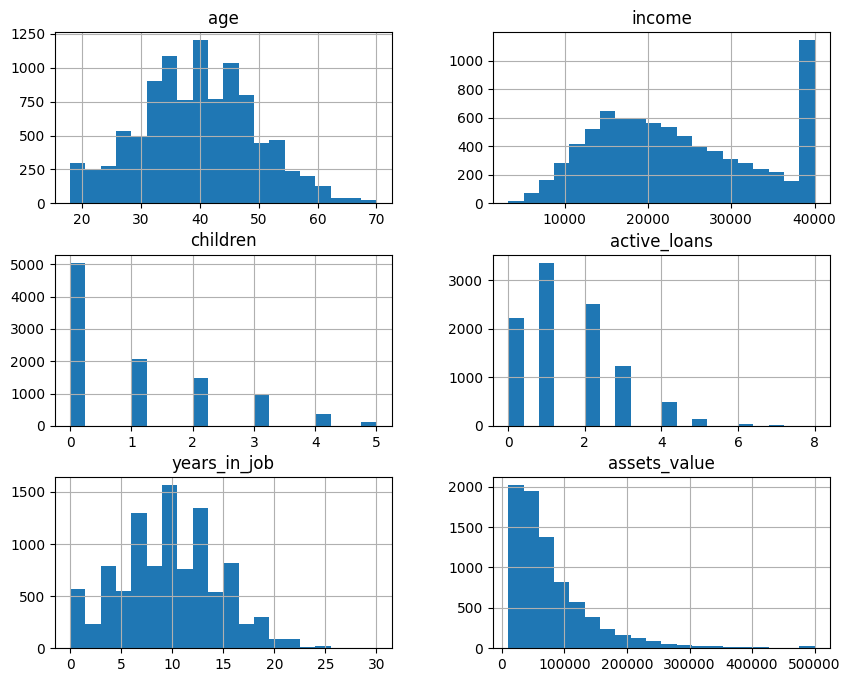

In [14]:
data[['age','income','children','active_loans','years_in_job','assets_value']].hist(bins=20, figsize=(10, 8))
plt.show()

`age` supposed to has a normal distribution

In [18]:
# Shapiro-Wilk test
sample = np.random.choice(data["age"], size=5000, replace=False)
stat, p = shapiro(sample)

# D'Agostino's K-squared test
stat1, p1 = normaltest(data["age"])

print("Shapiro-Wilk Test: p=%10f" %(p))
print("D'Agostino's K-squared Test: p=%.10f" %(p1))

Shapiro-Wilk Test: p=  0.000000
D'Agostino's K-squared Test: p=0.0000000013


In both tests p value is less than 0.05, so we can reject the null hypothesis and say that the age is not normally distributed.